In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_wine = pd.read_csv("winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

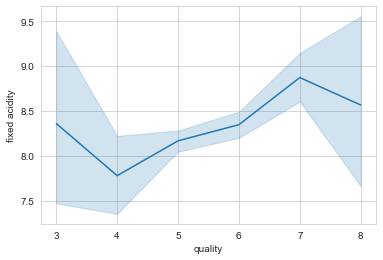

In [6]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x="quality", y="fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

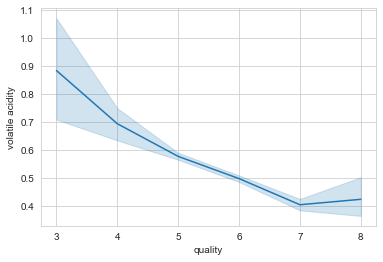

In [7]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x="quality", y="volatile acidity")
#As quality increases, volatile acidity decreases

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

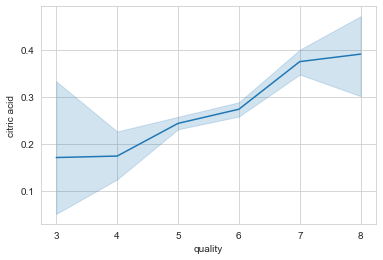

In [8]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

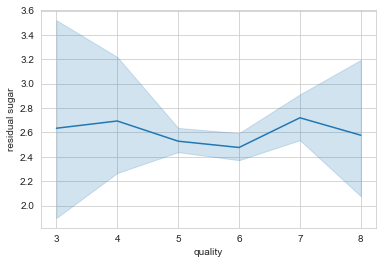

In [9]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

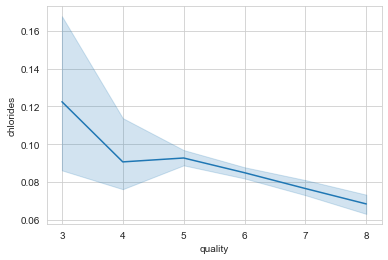

In [10]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='chlorides')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

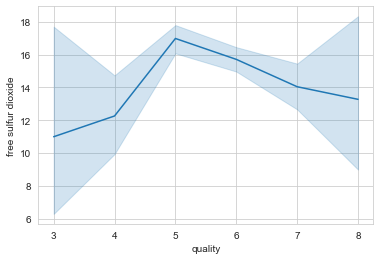

In [11]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

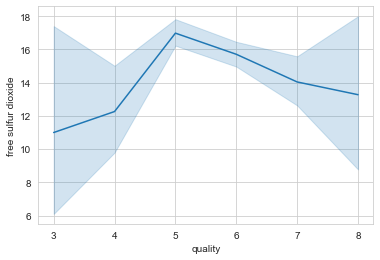

In [12]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

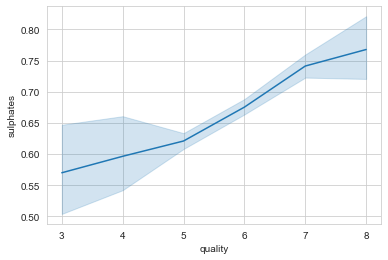

In [13]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

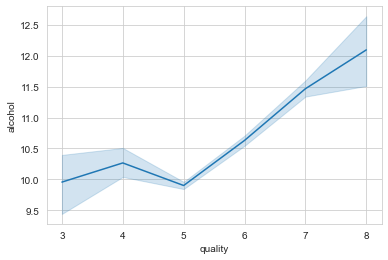

In [14]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='pH'>

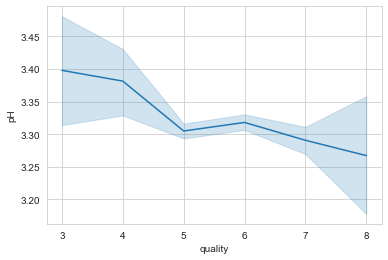

In [15]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='pH')

<AxesSubplot:xlabel='quality', ylabel='density'>

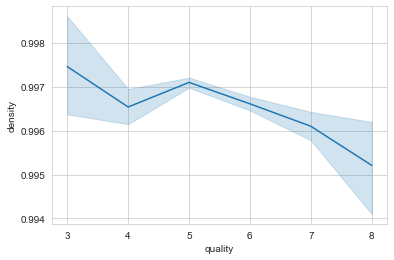

In [16]:
sns.set_style('whitegrid')
sns.lineplot(data=df_wine, x='quality', y='density')

## Takeaways

#### 1. As the quality increases composition of volatile acidity, chlorides decreases. Also pH and density also show a somewhat downward trend.

#### 1. As the quality increases composition of alcohol, sulphates and citric acid increases.

<AxesSubplot:>

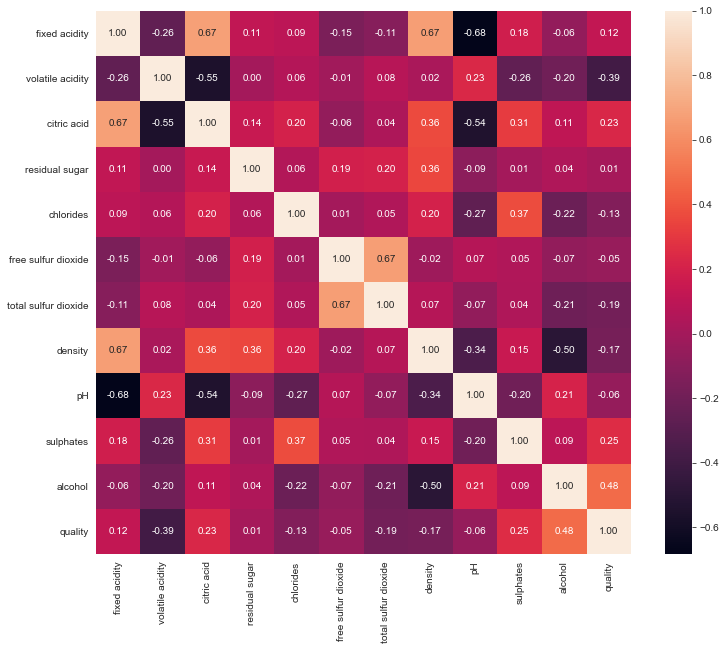

In [17]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_wine.corr(), annot=True, fmt=".2f")

In [18]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
#Decide if a wine is good or bad by putting the quality scores into bins
bins = (2, 6.5, 8)
quality_groups = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'], bins=bins, labels=quality_groups)

In [20]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [21]:
le = LabelEncoder()
df_wine['quality'] = le.fit_transform(df_wine['quality'])

In [22]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
df_wine.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\DIxitSHi\Anaconda3\envs\Python1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

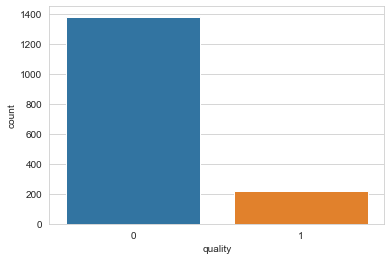

In [24]:
sns.countplot(df_wine.quality)

## Modeling

In [25]:
y = df_wine['quality']
X = df_wine.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
print(y_train.value_counts())
print(y_test.value_counts())

0    1109
1     170
Name: quality, dtype: int64
0    273
1     47
Name: quality, dtype: int64


In [30]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import StratifiedKFold, cross_val_score

### Logistic Regression

In [32]:
lr = LogisticRegression(random_state=2)
kfold = StratifiedKFold(n_splits=10)

In [33]:
# Cross validation accuracy
cross_val_score(estimator=lr, X=X_train, y=y_train, scoring="accuracy", cv = kfold, n_jobs=2)
cross_val_score(estimator=lr, X=X_train, y=y_train, scoring="accuracy", cv = kfold, n_jobs=2).mean()

0.885857529527559

In [34]:
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print("Accuracy on training set : ", accuracy_score(y_train, y_pred=y_pred_train))

Accuracy on training set :  0.8858483189992181


In [35]:
# Test set accuracy
y_pred = lr.predict(X_test)
print("Test set Accuracy : ", accuracy_score(y_test, y_pred))

Test set Accuracy :  0.875


In [36]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(con_mat)

Confusion Matrix
[[268   5]
 [ 35  12]]


<AxesSubplot:>

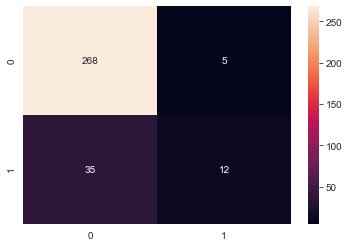

In [37]:
sns.heatmap(con_mat, annot=True, fmt='d')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=250, random_state=2)

In [40]:
cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=kfold, scoring="accuracy", n_jobs=2)
cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=kfold, scoring="accuracy", n_jobs=2).mean()

0.9093257874015748

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=2)

In [42]:
y_pred_rfc = rfc.predict(X_test)
print("Accuracy on Test set, RFC : ", accuracy_score(y_test, y_pred_rfc))

Accuracy on Test set, RFC :  0.86875


In [43]:
print("Confusion Matrix Test set, RFC : \n", confusion_matrix(y_test, y_pred_rfc))

Confusion Matrix Test set, RFC : 
 [[261  12]
 [ 30  17]]


In [44]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.59      0.36      0.45        47

    accuracy                           0.87       320
   macro avg       0.74      0.66      0.69       320
weighted avg       0.85      0.87      0.86       320



### SVM

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [48]:
param = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf', 'poly'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]    
}

svc = SVC()
best_svc = GridSearchCV(estimator=svc, param_grid=param, scoring="accuracy", cv=StratifiedKFold(n_splits=10))

In [49]:
best_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [50]:
best_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [62]:
svc_wine = SVC(C=1.2, gamma=0.9, kernel='rbf')
svc_wine.fit(X_train, y_train)
print("Test set Accuracy for SVM : ", accuracy_score(y_test, svc_wine.predict(X_test)))

Test set Accuracy for SVM :  0.896875


In [63]:
print(classification_report(y_test, svc_wine.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320

